## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [8]:
!head -n Data/countries_info.csv

'head' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [9]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [12]:
# Write your code here

# Reading the two datasets
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET)

In [19]:
#Verifying the format of the dataset
happiness.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States


In [20]:
#Verifying the format of the dataset
countries.head()

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"
3,argentina,2766890,39921833,"97,1"
4,armenia,29800,2976372,"98,6"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [37]:
# Merging the two datasets on the 'country' and 'country_name' columns
country_features = pd.concat([happiness, countries], axis=1)

#Dropping the redundant 'country_name' column
country_features = country_features.drop(columns=['country_name'])

#Displaying the first few rows of the merged dataset to see that all rows are in the final dataset
country_features.head()

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0"
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1"
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6"


In [38]:
#Checking the number of rows and columns in the final dataset
country_features.shape

(135, 11)

## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [39]:
#Displaying the countries based on their happiness score
country_features.sort_values(by='happiness_score', ascending=False).head(10)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
38,Finland,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe,338145,5231372,"100,0"
31,Denmark,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe,43094,5450661,"100,0"
115,Switzerland,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe,41290,7523934,"99,0"
50,Iceland,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe,103000,299388,"99,9"
92,Norway,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe,323802,4610820,"100,0"
87,Netherlands,7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe,41526,16491461,"99,0"
114,Sweden,7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe,449964,9016596,"99,0"
88,New Zealand,7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ,268680,4076140,"99,0"
6,Austria,7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe,83870,8192880,"98,0"
72,Luxembourg,7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe,2586,474413,"100,0"


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of countries for each world region.
Sort the result to show the happiness ranking.

In [69]:
country_features['world_region'].value_counts()

world_region
Sub-Saharan Africa                    32
Latin America and Caribbean           20
Western Europe                        20
Middle East and North Africa          16
Central and Eastern Europe            14
Commonwealth of Independent States    12
Southeast Asia                         8
South Asia                             6
North America and ANZ                  4
East Asia                              3
Name: count, dtype: int64

In [72]:
#Creating a new DataFrame with an average happiness score and the number of countries in each region
#Grouping each world region and calculating the average happiness score and the number of countries in each region

region_happiness = country_features.groupby('world_region')['happiness_score'].mean().reset_index()
region_happiness["number of countries"] = region_happiness.apply(lambda row: 
                                                                 country_features['world_region']
                                                                 .value_counts()[row['world_region']], axis=1)

#Sort the regions based on the average happiness score in ascending order
region_happiness = region_happiness.sort_values(by='happiness_score', ascending=False)
region_happiness

,world_region,happiness_score,number of countries
5,North America and ANZ,7.173525,4
9,Western Europe,6.967405,20
3,Latin America and Caribbean,5.971280,20
0,Central and Eastern Europe,5.891393,14
7,Southeast Asia,5.517788,8
2,East Asia,5.483633,3
1,Commonwealth of Independent States,5.358342,12
4,Middle East and North Africa,5.269306,16
8,Sub-Saharan Africa,4.393856,32
6,South Asia,4.355083,6


The first region has only a few countries! What are them and what is their score?

In [77]:
#Digging in the most happy region as per the average happiness score
most_happy_countries = country_features[country_features['world_region'] == 'North America and ANZ']

#Filtering only the columns that are required : country name and happiness score
most_happy_countries[["country", "happiness_score"]].sort_values(by='happiness_score', ascending=False)

,country,happiness_score
88,New Zealand,7.2996
21,Canada,7.2321
5,Australia,7.2228
127,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [93]:
#We will print the name of the countries with a level of literacy of 100%

literacy_100 = country_features[country_features['literacy'] == "100,0"].reset_index()
for index, literate_country in literacy_100.iterrows():
    print("%s - %s %s " % (literate_country['world_region'], literate_country['country'], literate_country['literacy']))
    

North America and ANZ - Australia 100,0 
Western Europe - Denmark 100,0 
Western Europe - Finland 100,0 
Western Europe - Luxembourg 100,0 
Western Europe - Norway 100,0 


What is the global average?

In [125]:
#We have to change the format of the data
countries_literacy_changed = country_features["literacy"].apply(lambda x: x.replace(",", ".") if type(x) == str else x)
countries_literacy_changed = countries_literacy_changed.reset_index().drop(columns='index')

average_literacy = countries_literacy_changed.astype(float).mean()
print("The global literacy average all over the world is", round(average_literacy, 2))
countries_literacy_changed


The global literacy average all over the world is literacy    81.85
dtype: float64


,literacy
0,36.0
1,86.5
2,70.0
3,97.1
4,98.6
...,...
130,93.4
131,90.3
132,50.2
133,80.6


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [130]:
countries_literacy_below_50 = countries_literacy_changed[countries_literacy_changed["literacy"].astype(float) < 50]

proportion_literacy_below_50 = countries_literacy_below_50.shape[0] / countries_literacy_changed.shape[0] * 100

print("The proportion of countries with a literacy rate below 50% is", round(proportion_literacy_below_50, 2))

The proportion of countries with a literacy rate below 50% is 11.85


Print the raw number and the percentage of world population that is illiterate.

In [142]:
countries_literacy = country_features[["population", "literacy"]].dropna()
countries_literacy["population literacy"] =  countries_literacy.apply(lambda row: row["population"] * float(row["literacy"].replace(",", "."))/ 100, axis=1)

raw_illiterate = countries_literacy["population"].sum() - countries_literacy["population literacy"].sum()

print("The raw number of illiterate people in the whole word is ", round(raw_illiterate))

illiterate_percentage = raw_illiterate / countries_literacy["population"].sum() * 100

print("The proportion of illiterate people in the whole world is", round(illiterate_percentage, 2))

The raw number of illiterate people in the whole word is  1249372988
The proportion of illiterate people in the whole world is 20.35


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [144]:
country_features["population_density"] = round(country_features["population"] / country_features["area"], 3)

country_features

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0",47.964
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5",124.588
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,"70,0",13.826
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,"97,1",14.428
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,"98,6",99.878
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,5.0532,0.890408,66.505341,0.623278,-0.169091,0.837038,Latin America and Caribbean,912050,25730435,"93,4",28.212
131,Vietnam,5.3535,0.849987,67.952736,0.939593,-0.094533,0.796421,Southeast Asia,329560,84402966,"90,3",256.108
132,Yemen,3.5274,0.817981,56.727283,0.599920,-0.157735,0.800288,Middle East and North Africa,527970,21456188,"50,2",40.639
133,Zambia,3.7594,0.698824,55.299377,0.806500,0.078037,0.801290,Sub-Saharan Africa,752614,11502010,"80,6",15.283


What is the happiness score of the 3 countries with the lowest population density?

In [148]:
low_dens_countries = country_features[["country","population_density", "happiness_score"]].sort_values(ascending=True, by="population_density").head(3)

for index, country in low_dens_countries.iterrows():
    print("%s has the lowest population density with %s people per square km and furthermore has the following happiness score : %s"
           % (country["country"], country["population_density"], country["happiness_score"]))

Mongolia has the lowest population density with 1.811 people per square km and furthermore has the following happiness score : 5.456200123
Australia has the lowest population density with 2.636 people per square km and furthermore has the following happiness score : 7.222799778
Botswana has the lowest population density with 2.731 people per square km and furthermore has the following happiness score : 3.478899956


## Task 6: Healthy and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

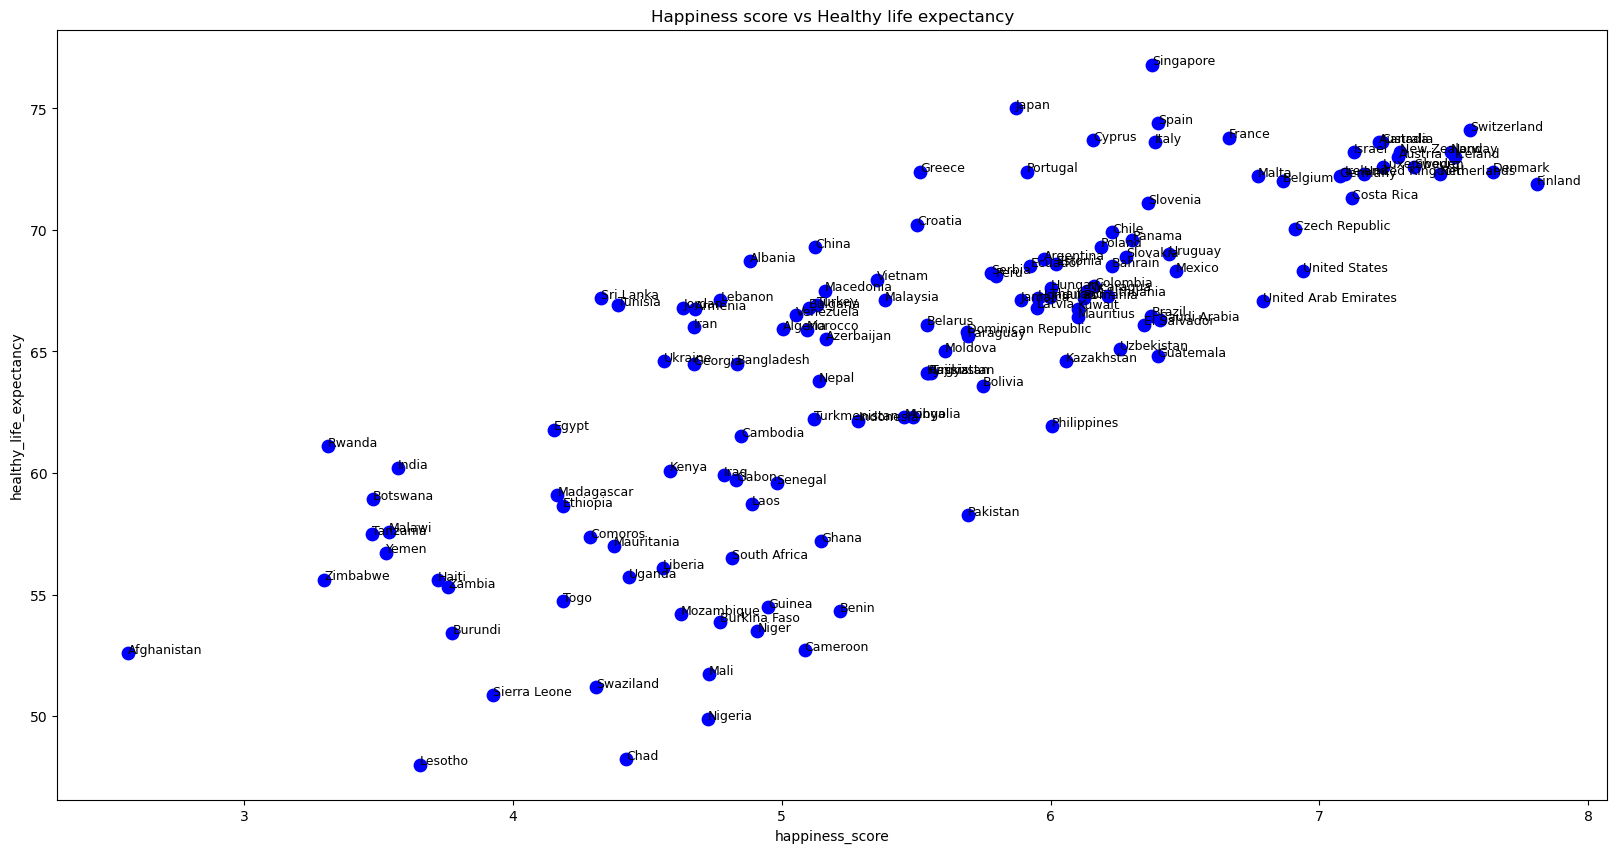

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline
#We will now scatter the happiness score (as x coordinates) and the healthy life expectancy (as y coordinates)

ax = country_features.plot.scatter(x='happiness_score', y='healthy_life_expectancy', c='blue', s=80)

# Adding annotations to each point
for i, row in country_features.iterrows():
    ax.annotate(row['country'], (row['happiness_score'], row['healthy_life_expectancy']), fontsize=9)

plt.title('Happiness score vs Healthy life expectancy')
plt.gcf().set_size_inches(20, 10)
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.